In [2]:
import pandas as pd
import numpy as np

import sqlite3

from matplotlib import pyplot as plt
import seaborn as sns

import locale

locale.setlocale(locale.LC_ALL, "tr_TR")
pd.options.display.max_columns = None
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../data/sahibinden_konut.csv")
df.head()

,satilik_m2_brutfiyat,cat1,cat2,cat3,cat4,cat0,loc1,loc2,loc3,loc4,loc5,m2_brut,m2_net,oda_sayisi,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,kullanim_durumu,site_icerisinde,site_adi,aidat_tl,krediye_uygun,tapu_durumu,kimden,goruntulu_arama_ile_gezilebilir,fiyat,ilan_aks,lat,lon,Batı,Doğu,Güney,Kuzey,ADSL,Ahşap Doğrama,Akıllı Ev,Alarm (Hırsız),Alarm (Yangın),Alaturka Tuvalet,Alüminyum Doğrama,Amerikan Kapı,Amerikan Mutfak,Ankastre Fırın,Asansör,Barbekü,Beyaz Eşya,Boyalı,Bulaşık Makinesi,Buzdolabı,Çamaşır Kurutma Makinesi,Çamaşır Makinesi,Çamaşır Odası,Çelik Kapı,Duşakabin,Duvar Kağıdı,Ebeveyn Banyosu,Fırın,Fiber İnternet,Giyinme Odası,Gömme Dolap,Görüntülü Diafon,Hilton Banyo,Intercom Sistemi,Isıcam,Jakuzi,Kartonpiyer,Kiler,Klima,Küvet,Laminat Zemin,Marley,Mobilya,Mutfak (Ankastre),Mutfak (Laminat),Mutfak Doğalgazı,Panjur/Jaluzi,Parke Zemin,PVC Doğrama,Seramik Zemin,Set Üstü Ocak,Spot Aydınlatma,Şofben,Şömine,Teras,Termosifon,Vestiyer,Wi-Fi,Yüz Tanıma & Parmak İzi,24 Saat Güvenlik,Buhar Odası,Çocuk Oyun Parkı,Hamam,Hidrofor,Isı Yalıtımı,Jeneratör,Kablo TV,Kamera Sistemi,Kapıcı,Kreş,Müstakil Havuzlu,Otopark - Açık,Otopark - Kapalı,Sauna,Ses Yalıtımı,Siding,Spor Alanı,Su Deposu,Tenis Kortu,Uydu,Yangın Merdiveni,Yüzme Havuzu (Açık),Yüzme Havuzu (Kapalı),Alışveriş Merkezi,Belediye,Cami,Cemevi,Denize Sıfır,Eczane,Eğlence Merkezi,Fuar,Hastane,Havra,İlkokul-Ortaokul,İtfaiye,Kilise,Lise,Market,Park,Plaj,Polis Merkezi,Sağlık Ocağı,Semt Pazarı,Spor Salonu,Şehir Merkezi,Üniversite,Anayol,Avrasya Tüneli,Boğaz Köprüleri,Cadde,Deniz Otobüsü,Dolmuş,E-5,Havaalanı,İskele,Marmaray,Metro,Metrobüs,Minibüs,Otobüs Durağı,Sahil,Teleferik,TEM,Tramvay,Tren İstasyonu,Troleybüs,Boğaz,Deniz,Doğa,Göl,Havuz,Park & Yeşil Alan,Şehir,Ara Kat,Ara Kat Dubleks,Bahçe Dubleksi,Bahçe Katı,Bahçeli,Çatı Dubleksi,En Üst Kat,Forleks,Garaj / Dükkan Üstü,Giriş Katı,Kat Dubleksi,Loft,Müstakil Girişli,Ters Dubleks,Tripleks,Zemin Kat,Araç Park Yeri,Banyo,Geniş Koridor,Giriş / Rampa,Merdiven,Mutfak,Oda Kapısı,Priz / Elektrik Anahtarı,Tutamak / Korkuluk,Tuvalet,Yüzme Havuzu,ad_id,kiralik_m2_brutfiyat,depozito_tl,arazi_m2,salon_sayisi,yapi_tipi,yapinin_durumu,zemin_etudu,Ankastre Mutfak,Arıtma Sistemi,Çini,Fayans,Halı Döşeme,Hazır Mutfak,Hilton Lavabo,Karo Seramik,Laminant Parke,Parke,PVC Kaplama,Siding Kaplama,BTB Kaplama,Taş Kaplama,Ahşap Kaplama,Yayla,Intercom,Telefon Hattı,Yangın Alarmı,Hırsız Alarmı,Güvenlik Kamerası,Su Yalıtımı,Veteriner,Restoran,Internet Cafe,dis_cephe,yapi_malzemesi,Alçıpan,Ankastre Set,Mutfak Dolabı,Shingle,Strafor,krediye_uygunluk,Mermer Kaplama,Doğu Mimarisi,Türk Mimarisi,Batı Mimarisi,Altın Varak Tavan,Asma Tavan,Yüksek Tavan,depozito,goruntulu_arama_ile_gorulebilir
0,40000-45000,emlak,konut,satilik,daire,emlak-konut-satilik-daire,turkiye,antalya,alanya,alanya,mahmutlar-mh.,60.0,50.0,1-1,1,4,9,klima,1,var,evet,bos,hayir,belirtilmemis,500.0,evet,kat-mulkiyetli,sahibinden,evet,2450000.0,bakan,36.485817,32.104780,selected,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,selected,selected,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,selected,NaN,selected,NaN,selected,selected,NaN,selected,selected,NaN,selected,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094202721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [11]:
sale = df.query("cat3 == 'satilik'").reset_index(drop=True)

In [23]:
indices= sale["loc2"].value_counts()[sale["loc2"].value_counts() > 5].index
mapping = sale.groupby("loc2").apply(lambda x: x.name if x.name in indices else "other")
sale["region"] = sale["loc2"].map(mapping)
sale = sale.loc[sale["fiyat"] < sale["fiyat"].quantile(q=0.95)]
sale["bina_yasi"] = sale.bina_yasi.replace(dict((str(k), "5-ve-alti") for k in range(6)))

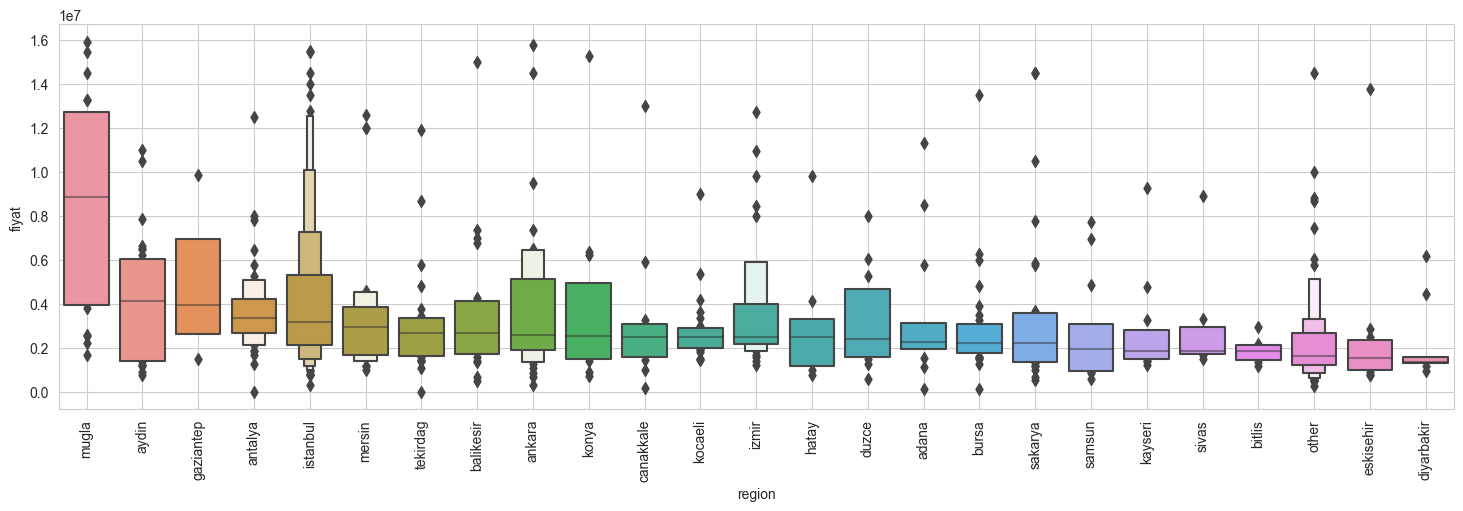

In [13]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxenplot(data=sale, x="region", y="fiyat", order=sale.groupby("region")["fiyat"].median().sort_values(ascending=False).index, ax=ax)
# sns.scatterplot(data=df_cat3_by_year_base, x="cat3", y="fiyat", size="yil", hue="yil", ax=ax, palette=sns.color_palette("tab10"), alpha=0.5)
plt.grid(True)
plt.xticks(rotation=90);

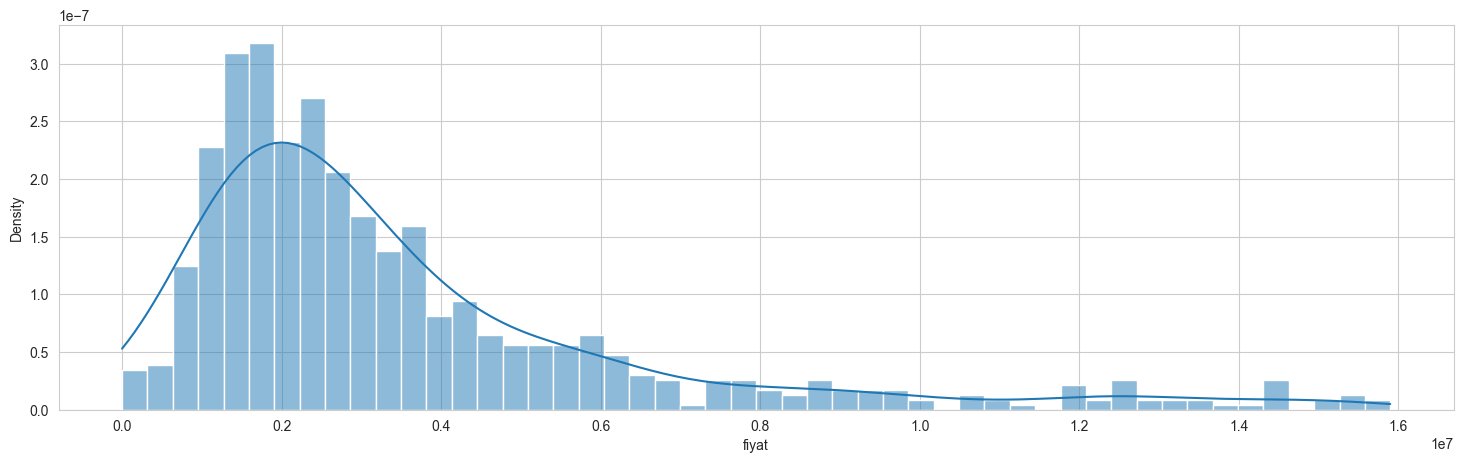

In [18]:
plt.figure(figsize=(18, 5))
sns.histplot(x="fiyat", data=sale, bins=50, kde=True, stat="density")
plt.show()

In [24]:
sale.head()

,satilik_m2_brutfiyat,cat1,cat2,cat3,cat4,cat0,loc1,loc2,loc3,loc4,loc5,m2_brut,m2_net,oda_sayisi,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,kullanim_durumu,site_icerisinde,site_adi,aidat_tl,krediye_uygun,tapu_durumu,kimden,goruntulu_arama_ile_gezilebilir,fiyat,ilan_aks,lat,lon,Batı,Doğu,Güney,Kuzey,ADSL,Ahşap Doğrama,Akıllı Ev,Alarm (Hırsız),Alarm (Yangın),Alaturka Tuvalet,Alüminyum Doğrama,Amerikan Kapı,Amerikan Mutfak,Ankastre Fırın,Asansör,Barbekü,Beyaz Eşya,Boyalı,Bulaşık Makinesi,Buzdolabı,Çamaşır Kurutma Makinesi,Çamaşır Makinesi,Çamaşır Odası,Çelik Kapı,Duşakabin,Duvar Kağıdı,Ebeveyn Banyosu,Fırın,Fiber İnternet,Giyinme Odası,Gömme Dolap,Görüntülü Diafon,Hilton Banyo,Intercom Sistemi,Isıcam,Jakuzi,Kartonpiyer,Kiler,Klima,Küvet,Laminat Zemin,Marley,Mobilya,Mutfak (Ankastre),Mutfak (Laminat),Mutfak Doğalgazı,Panjur/Jaluzi,Parke Zemin,PVC Doğrama,Seramik Zemin,Set Üstü Ocak,Spot Aydınlatma,Şofben,Şömine,Teras,Termosifon,Vestiyer,Wi-Fi,Yüz Tanıma & Parmak İzi,24 Saat Güvenlik,Buhar Odası,Çocuk Oyun Parkı,Hamam,Hidrofor,Isı Yalıtımı,Jeneratör,Kablo TV,Kamera Sistemi,Kapıcı,Kreş,Müstakil Havuzlu,Otopark - Açık,Otopark - Kapalı,Sauna,Ses Yalıtımı,Siding,Spor Alanı,Su Deposu,Tenis Kortu,Uydu,Yangın Merdiveni,Yüzme Havuzu (Açık),Yüzme Havuzu (Kapalı),Alışveriş Merkezi,Belediye,Cami,Cemevi,Denize Sıfır,Eczane,Eğlence Merkezi,Fuar,Hastane,Havra,İlkokul-Ortaokul,İtfaiye,Kilise,Lise,Market,Park,Plaj,Polis Merkezi,Sağlık Ocağı,Semt Pazarı,Spor Salonu,Şehir Merkezi,Üniversite,Anayol,Avrasya Tüneli,Boğaz Köprüleri,Cadde,Deniz Otobüsü,Dolmuş,E-5,Havaalanı,İskele,Marmaray,Metro,Metrobüs,Minibüs,Otobüs Durağı,Sahil,Teleferik,TEM,Tramvay,Tren İstasyonu,Troleybüs,Boğaz,Deniz,Doğa,Göl,Havuz,Park & Yeşil Alan,Şehir,Ara Kat,Ara Kat Dubleks,Bahçe Dubleksi,Bahçe Katı,Bahçeli,Çatı Dubleksi,En Üst Kat,Forleks,Garaj / Dükkan Üstü,Giriş Katı,Kat Dubleksi,Loft,Müstakil Girişli,Ters Dubleks,Tripleks,Zemin Kat,Araç Park Yeri,Banyo,Geniş Koridor,Giriş / Rampa,Merdiven,Mutfak,Oda Kapısı,Priz / Elektrik Anahtarı,Tutamak / Korkuluk,Tuvalet,Yüzme Havuzu,ad_id,kiralik_m2_brutfiyat,depozito_tl,arazi_m2,salon_sayisi,yapi_tipi,yapinin_durumu,zemin_etudu,Ankastre Mutfak,Arıtma Sistemi,Çini,Fayans,Halı Döşeme,Hazır Mutfak,Hilton Lavabo,Karo Seramik,Laminant Parke,Parke,PVC Kaplama,Siding Kaplama,BTB Kaplama,Taş Kaplama,Ahşap Kaplama,Yayla,Intercom,Telefon Hattı,Yangın Alarmı,Hırsız Alarmı,Güvenlik Kamerası,Su Yalıtımı,Veteriner,Restoran,Internet Cafe,dis_cephe,yapi_malzemesi,Alçıpan,Ankastre Set,Mutfak Dolabı,Shingle,Strafor,krediye_uygunluk,Mermer Kaplama,Doğu Mimarisi,Türk Mimarisi,Batı Mimarisi,Altın Varak Tavan,Asma Tavan,Yüksek Tavan,depozito,goruntulu_arama_ile_gorulebilir,region
0,40000-45000,emlak,konut,satilik,daire,emlak-konut-satilik-daire,turkiye,antalya,alanya,alanya,mahmutlar-mh.,60.0,50.0,1-1,5-ve-alti,4,9,klima,1,var,evet,bos,hayir,belirtilmemis,500.0,evet,kat-mulkiyetli,sahibinden,evet,2450000.0,bakan,36.485817,32.104780,selected,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,selected,selected,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,selected,NaN,selected,NaN,selected,selected,NaN,selected,selected,NaN,selected,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094202721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [29]:
sale.groupby("bina_yasi").fiyat.describe().round()

,count,mean,std,min,25%,50%,75%,max
bina_yasi,,,,,,,,
11-15-arasi,54.0,3825907.0,2696840.0,650000.0,1512500.0,3075000.0,5475000.0,10500000.0
16-20-arasi,45.0,3167756.0,1964751.0,585000.0,1700000.0,2750000.0,4200000.0,9500000.0
21-25-arasi,39.0,2452180.0,1681688.0,3.0,1412500.0,1850000.0,3212500.0,7990000.0
26-30-arasi,30.0,2818567.0,1614917.0,850000.0,1725000.0,2410000.0,3462500.0,8000000.0
31-ve-uzeri,27.0,3333704.0,2276933.0,475000.0,1762500.0,2450000.0,4925000.0,10000000.0
5-10-arasi,131.0,3072279.0,2046729.0,295000.0,1512500.0,2500000.0,3995000.0,10500000.0
5-ve-alti,364.0,3040579.0,1992461.0,3750.0,1650000.0,2500000.0,3650000.0,10500000.0


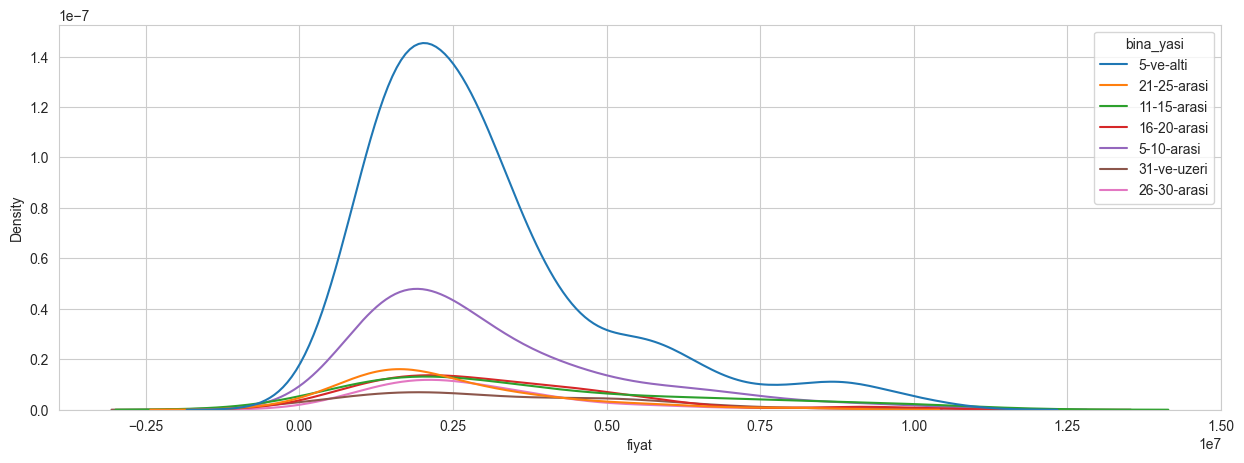

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(x="fiyat", data=sale, fill=False, hue="bina_yasi", ax=ax);

In [41]:
sale.head()

,satilik_m2_brutfiyat,cat1,cat2,cat3,cat4,cat0,loc1,loc2,loc3,loc4,loc5,m2_brut,m2_net,oda_sayisi,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,kullanim_durumu,site_icerisinde,site_adi,aidat_tl,krediye_uygun,tapu_durumu,kimden,goruntulu_arama_ile_gezilebilir,fiyat,ilan_aks,lat,lon,Batı,Doğu,Güney,Kuzey,ADSL,Ahşap Doğrama,Akıllı Ev,Alarm (Hırsız),Alarm (Yangın),Alaturka Tuvalet,Alüminyum Doğrama,Amerikan Kapı,Amerikan Mutfak,Ankastre Fırın,Asansör,Barbekü,Beyaz Eşya,Boyalı,Bulaşık Makinesi,Buzdolabı,Çamaşır Kurutma Makinesi,Çamaşır Makinesi,Çamaşır Odası,Çelik Kapı,Duşakabin,Duvar Kağıdı,Ebeveyn Banyosu,Fırın,Fiber İnternet,Giyinme Odası,Gömme Dolap,Görüntülü Diafon,Hilton Banyo,Intercom Sistemi,Isıcam,Jakuzi,Kartonpiyer,Kiler,Klima,Küvet,Laminat Zemin,Marley,Mobilya,Mutfak (Ankastre),Mutfak (Laminat),Mutfak Doğalgazı,Panjur/Jaluzi,Parke Zemin,PVC Doğrama,Seramik Zemin,Set Üstü Ocak,Spot Aydınlatma,Şofben,Şömine,Teras,Termosifon,Vestiyer,Wi-Fi,Yüz Tanıma & Parmak İzi,24 Saat Güvenlik,Buhar Odası,Çocuk Oyun Parkı,Hamam,Hidrofor,Isı Yalıtımı,Jeneratör,Kablo TV,Kamera Sistemi,Kapıcı,Kreş,Müstakil Havuzlu,Otopark - Açık,Otopark - Kapalı,Sauna,Ses Yalıtımı,Siding,Spor Alanı,Su Deposu,Tenis Kortu,Uydu,Yangın Merdiveni,Yüzme Havuzu (Açık),Yüzme Havuzu (Kapalı),Alışveriş Merkezi,Belediye,Cami,Cemevi,Denize Sıfır,Eczane,Eğlence Merkezi,Fuar,Hastane,Havra,İlkokul-Ortaokul,İtfaiye,Kilise,Lise,Market,Park,Plaj,Polis Merkezi,Sağlık Ocağı,Semt Pazarı,Spor Salonu,Şehir Merkezi,Üniversite,Anayol,Avrasya Tüneli,Boğaz Köprüleri,Cadde,Deniz Otobüsü,Dolmuş,E-5,Havaalanı,İskele,Marmaray,Metro,Metrobüs,Minibüs,Otobüs Durağı,Sahil,Teleferik,TEM,Tramvay,Tren İstasyonu,Troleybüs,Boğaz,Deniz,Doğa,Göl,Havuz,Park & Yeşil Alan,Şehir,Ara Kat,Ara Kat Dubleks,Bahçe Dubleksi,Bahçe Katı,Bahçeli,Çatı Dubleksi,En Üst Kat,Forleks,Garaj / Dükkan Üstü,Giriş Katı,Kat Dubleksi,Loft,Müstakil Girişli,Ters Dubleks,Tripleks,Zemin Kat,Araç Park Yeri,Banyo,Geniş Koridor,Giriş / Rampa,Merdiven,Mutfak,Oda Kapısı,Priz / Elektrik Anahtarı,Tutamak / Korkuluk,Tuvalet,Yüzme Havuzu,ad_id,kiralik_m2_brutfiyat,depozito_tl,arazi_m2,salon_sayisi,yapi_tipi,yapinin_durumu,zemin_etudu,Ankastre Mutfak,Arıtma Sistemi,Çini,Fayans,Halı Döşeme,Hazır Mutfak,Hilton Lavabo,Karo Seramik,Laminant Parke,Parke,PVC Kaplama,Siding Kaplama,BTB Kaplama,Taş Kaplama,Ahşap Kaplama,Yayla,Intercom,Telefon Hattı,Yangın Alarmı,Hırsız Alarmı,Güvenlik Kamerası,Su Yalıtımı,Veteriner,Restoran,Internet Cafe,dis_cephe,yapi_malzemesi,Alçıpan,Ankastre Set,Mutfak Dolabı,Shingle,Strafor,krediye_uygunluk,Mermer Kaplama,Doğu Mimarisi,Türk Mimarisi,Batı Mimarisi,Altın Varak Tavan,Asma Tavan,Yüksek Tavan,depozito,goruntulu_arama_ile_gorulebilir,region
0,40000-45000,emlak,konut,satilik,daire,emlak-konut-satilik-daire,turkiye,antalya,alanya,alanya,mahmutlar-mh.,60.0,50.0,1-1,5-ve-alti,4,9,klima,1,var,evet,bos,hayir,belirtilmemis,500.0,evet,kat-mulkiyetli,sahibinden,evet,2450000.0,bakan,36.485817,32.104780,selected,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,selected,selected,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,selected,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,selected,NaN,selected,NaN,selected,selected,NaN,selected,selected,NaN,selected,NaN,NaN,selected,selected,NaN,selected,selected,selected,selected,selected,selected,NaN,selected,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,selected,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094202721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

/Users/berkayg/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/berkayg/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


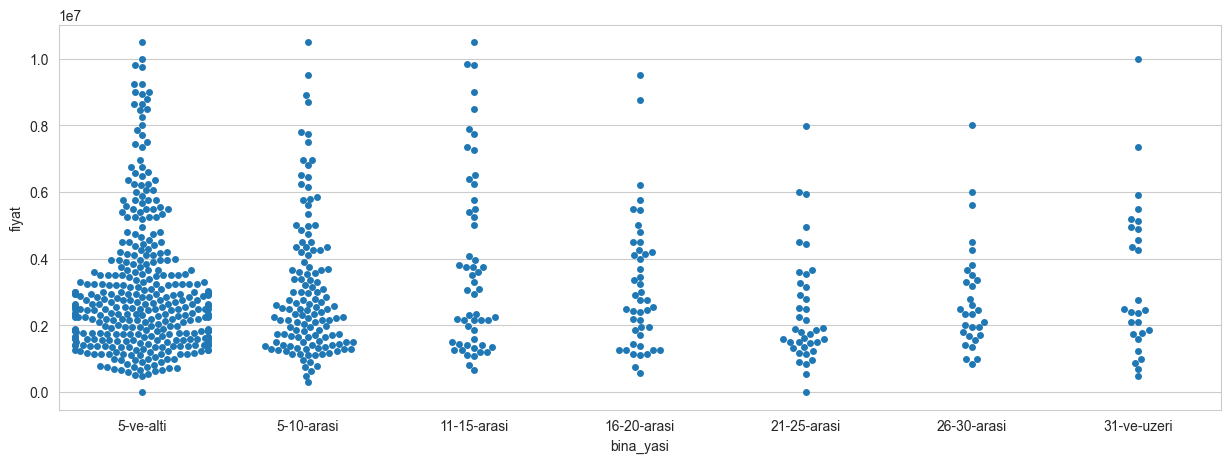

In [45]:
# sns.kdeplot(x="yil", y="fiyat", data=df.query("fiyat < 4000000"), fill=True);
fig, ax = plt.subplots(figsize=(15, 5))
sns.swarmplot(data=sale.dropna(subset=["bina_yasi"]), y="fiyat", x="bina_yasi", order=["5-ve-alti", "5-10-arasi", "11-15-arasi", "16-20-arasi", "21-25-arasi", "26-30-arasi", "31-ve-uzeri"]);

<Axes: xlabel='km_trans', ylabel='fiyat_trans'>

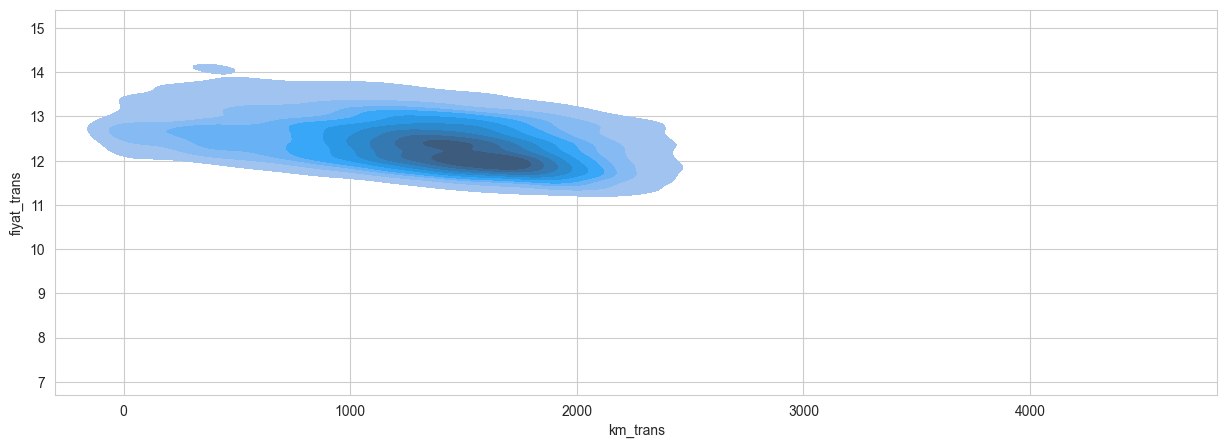

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(x="km_trans", y="fiyat_trans", data=df_cropped, fill=True)
# plt.ylim((0, 1500000))
# plt.xlim((0, 50000))

In [ ]:
pca = PCA(n_components=20)
pca_results = pca.fit_transform(cluster)
print(pca.explained_variance_ratio_.sum())

0.8059161399498407


In [9]:
from umap import UMAP
umap = UMAP(metric='hamming', random_state=42, low_memory=True)
umap_results = umap.fit_transform(cluster)

/Users/berkayg/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [24]:
# df_subset = pd.DataFrame(tsne_results, columns=["tsne1", "tsne2"])
df_subset = df.copy().query("yil >= 2020")
df_subset["tsne1"] = tsne_results[:, 0]
df_subset["tsne2"] = tsne_results[:, 1]
df_subset["pca1"] = pca_results[:, 0]
df_subset["pca2"] = pca_results[:, 1]
df_subset["umap1"] = umap_results[:, 0]
df_subset["umap2"] = umap_results[:, 1]

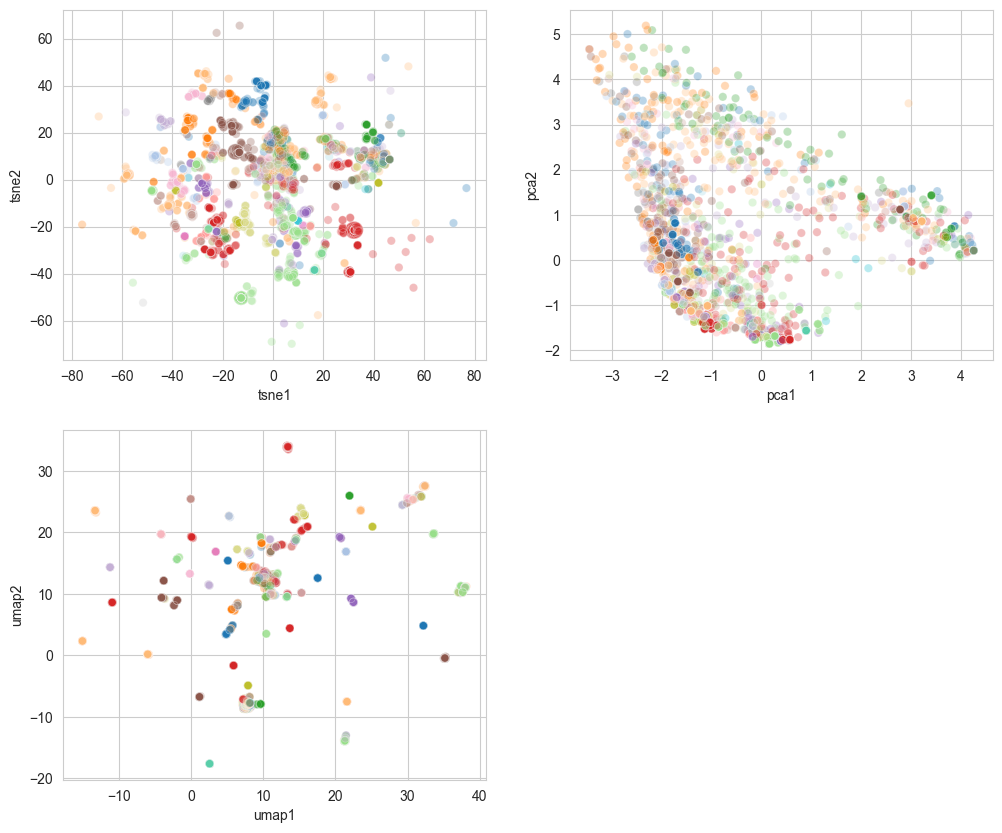

In [25]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(
x="tsne1", y="tsne2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)

plt.subplot(2, 2, 2)
sns.scatterplot(
x="pca1", y="pca2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)

plt.subplot(2, 2, 3)
sns.scatterplot(
x="umap1", y="umap2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)


plt.show()

In [152]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="umap1", y="umap2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )

In [153]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne1", y="tsne2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.1
# )

In [154]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca1", y="pca2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )

In [39]:
# PAIRWISE_DISTANCE_FUNCTIONS
df.head()

,adid,title,description,datestring,date,cat1,cat2,cat3,cat4,cat5,cat6,cat0,loc1,loc2,loc3,loc4,loc5,yil,yakit,vites,km,kasatipi,motorgucu,motorhacmi,cekis,renk,garanti,kimden,fiyat,url,checked,frontbumper,fronthood,roof,frontrightmudguard,frontrightdoor,rearrightdoor,rearrightmudguard,frontleftmudguard,frontleftdoor,rearleftdoor,rearleftmudguard,rearhood,rearbumper,slacklabel,ABC,ABS,AEB,EBP,ASR,ESPVSA,Airmatic,EDL,EBA,EBD,TCS,BAS,Distronic,YokuşKalkışDesteği,ZırhlıAraç,GeceGörüş,ŞerittenAyrılmaİkazı,ŞeritDeğiştirmeYardımcısı,HavaYastığıSürücü,HavaYastığıYolcu,HavaYastığıYan,HavaYastığıDiz,HavaYastığıPerde,HavaYastığıTavan,KörNoktaUyarıSistemi,LastikArızaGöstergesi,YorgunlukTespitSistemi,Isofix,Alarm,ÇocukKilidi,MerkeziKilit,Immobilizer,DeriKoltuk,KumaşKoltuk,DeriKumaşKoltuk,ElektrikliÖnCamlar,ElektrikliArkaCamlar,KlimaAnalog,KlimaDijital,OtmKararanDikizAynası,ÖnKolDayama,ArkaKolDayama,AnahtarsızGirişveÇalıştırma,num6İleriVites,num7İleriVites,HidrolikDireksiyon,FonksiyonelDireksiyon,AyarlanabilirDireksiyon,DeriDireksiyon,AhşapDireksiyon,IsıtmalıDireksiyon,KoltuklarElektrikli,KoltuklarHafızalı,KoltuklarKatlanır,KoltuklarÖnIsıtmalı,KoltuklarArkaIsıtmalı,KoltuklarSoğutmalı,HızSabitleyici,AdaptiveCruiseControl,SoğutmalıTorpido,YolBilgisayarı,KromKaplama,AhşapKaplama,HeadupDisplay,StartStop,GeriGörüşKamerası,ÖnGörüşKamerası,num3SıraKoltuk,Hardtop,FarLED,FarHalojen,FarXenon,FarBiXenon,FarSis,FarAdaptif,FarGeceSensörü,FarYıkama,AynalarElektrikli,AynalarOtomKatlanır,AynalarIsıtmalı,AynalarHafızalı,ParkSensörüArka,ParkSensörüÖn,ParkAsistanı,AlaşımlıJant,Sunroof,PanoramikCamTavan,YağmurSensörü,ArkaCamBuzÇözücü,PanoramikÖnCam,RomörkÇekiDemiri,AkıllıBagajKapağı,RadyoKasetçalar,RadyoCDÇalar,RadyoMP3Çalar,Navigasyon,TV,BluetoothTelefon,USBAUX,AUX,iPodBağlantısı,num6Hoparlör,CDDeğiştirici,ArkaEğlencePaketi,DVDDeğiştirici
0,951495082,AE MOTORS TR'DE TEK HATASIZ&BOYASIZ+TRAMERSİZ+...,2014 MODEL BMW 118İ 4 SİLİNDİR 170 HP\nORJİNAL...,01 Ekim 2021,2021-10-01,vasita,otomobil,bmw,1-serisi,118i,m-plus,vasita-otomobil-bmw-1-serisi-118i-m-plus,turkiye,istanbul,esenyurt,esenyurt,gokevler-mh.,2014,benzin,otomatik,100000,hatchback-5-kapi,170,1598,arkadan-itis,mavi,hayir,galeriden,289500,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0
1,945820122,"""TÜRKİYEDE İLK VE TEK İÇ DIŞ YENİ KASA C200 AM...",İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,siyah,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,945858258,YENİ KASA TR DE İLK VE TEK MERCEDES C200 AMG A...,İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,beyaz,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0